# Sentiment Analysis : Debat Capres 2019

## 1. Load dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

df = pd.read_csv("DebatCapres2019/debat_1.csv")
df.head()

,tokoh,text
0,jw1,Assalamu'alaikum warohmatullah wabarokatuh. Wa...
1,ps2,Bismillahirrahmaanirrahim assalamu'alaikum wr....
2,su2,Hukum yang tidak tebang pilih tidak tajam ke b...
3,ps2,Kami akan memberdayakan badan pembinaan hukum ...
4,su2,Partisiapasi public juga sangat penting. Kami ...


In [2]:
dataset = 'corpora_clean'

In [3]:
berita_train = load_files(dataset, shuffle=True)

In [4]:
# Berapa total data corpora
len(berita_train.data)

130

In [5]:
berita_train.target_names

['clean_neg', 'clean_positif']

In [6]:
# print deskripsi
berita_train.data[0][:200]

b'mardani ali sindir strategi deklarasi alumni ala jokowiwakil ketua bpn prabowosandiaga mardani ali sera sindir strategi deklarasi alumni yang usung kubu capres nomor urut 01 jokowi untuk raih simpati '

In [7]:
# Posisi data corpora
berita_train.filenames[1]

'corpora_clean\\clean_neg\\neg60.txt'

In [8]:
berita_train.target[0]

0

## 2. Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,tokoh,text
count,73,73
unique,4,72
top,ps2,Cukup.
freq,30,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
tokoh    73 non-null object
text     73 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


In [11]:
# Visualisasi Analisa Awal
df['tokoh'].value_counts()

ps2    30
jw1    27
su2    10
ma1     6
Name: tokoh, dtype: int64

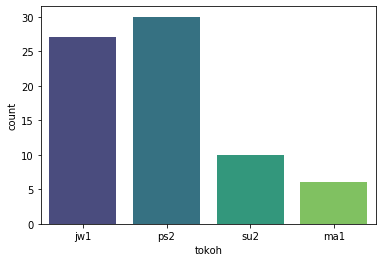

In [12]:
sns.countplot(x='tokoh',data=df,palette='viridis')

## 3. Transform debat dataset into matrix

In [13]:
berita_vec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)        
berita_counts = berita_vec.fit_transform(berita_train.data)

In [14]:
# Jumlah kata 'Prabowo' dalam dataset
berita_vec.vocabulary_.get('prabowo')

3620

In [15]:
# Jumlah kata 'Jokowi' dalam dataset
berita_vec.vocabulary_.get('jokowi')

2101

In [16]:
berita_counts.shape

(130, 5030)

In [17]:
tfidf_transformer = TfidfTransformer()
berita_tfidf = tfidf_transformer.fit_transform(berita_counts)
berita_tfidf.toarray()

array([[0.        , 0.        , 0.09347067, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 4. Training dan testing : Naive Bayes Classifier

In [18]:
docs_train, docs_test, y_train, y_test = train_test_split(
    berita_tfidf, berita_train.target, test_size = 0.20, random_state = 12)

In [19]:
clf = MultinomialNB().fit(docs_train, y_train)

In [20]:
y_pred = clf.predict(docs_test)
accuracy_score(y_test, y_pred)

0.7692307692307693

In [21]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1])

## 5. Evaluasi

In [22]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.67      0.91      0.77        11

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



### Akurasi dari data corpora sebesar 84%. Sudah bagus... 

## 6. Visualisasi hasil prediksi

In [23]:
final = pd.DataFrame({'category': y_pred})
final.to_csv('DebatCapres2019/debat_final_1.csv',index=False)

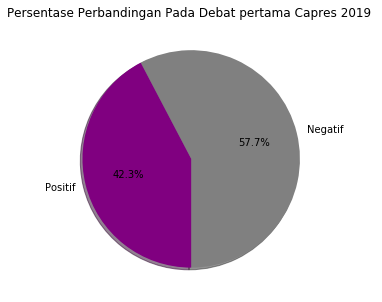

In [24]:
# Data plotting visual
data_1 = pd.read_csv("DebatCapres2019/debat_final_1.csv")
sizes = data_1['category'].value_counts(sort = True)
df['category'] = data_1['category']
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
labels = ["Negatif","Positif"]

# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Persentase Perbandingan Pada Debat pertama Capres 2019 ')
plt.show()

## Perbandingan Sentiment Analysis pada tiap cawapres 2019 

In [25]:
df['category'].value_counts()

1.0    15
0.0    11
Name: category, dtype: int64

#### Ket :
#### 1 = Positif
#### 0 = Negatif
#### jw1 = Jokowidodo
#### ps2 = Prabowo Subianto
#### ma1 = Ma'ruf Amin
#### su2 = Sandiaga Uno

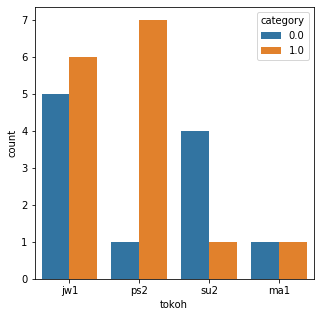

In [26]:
ax = sns.countplot(x="tokoh", 
                   hue="category", 
                   data=df)

# Finish...